In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [3]:
mangaid = '1-43214'
nsa_z = 0.117997
plateifu = '8135-1902'

In [4]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-8135-1902-LOGCUBE.fits.gz')

flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))

do_not_use = (mask & 2**10) != 0 

wave = data['WAVE'].data

flux_header = data['FLUX'].header

In [5]:
n = len(flux)
sumflux = np.zeros(4563)
    
for i in range(n):
    for j in range(n):
        flux[i,j] = flux[i,j] * ~do_not_use[i,j]
        sumflux = np.add(sumflux, flux[i,j])

In [6]:
a = 5007 * (1 + nsa_z)

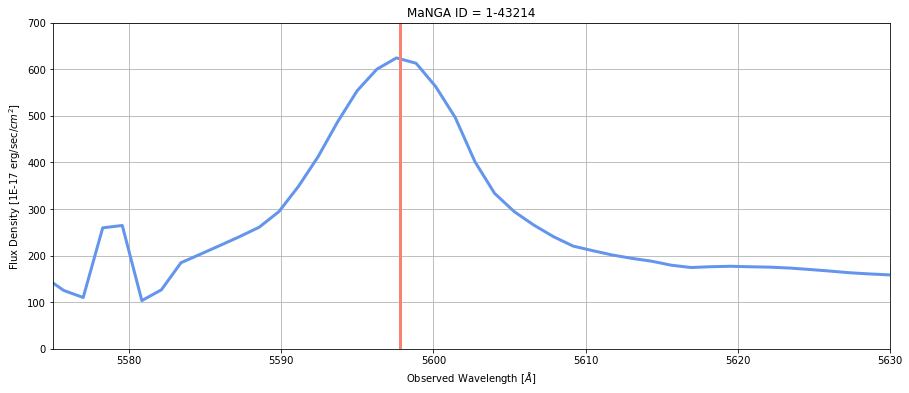

In [7]:
start = 5575
end = 5630
height = 700
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start, end)
plt.ylim(0,height)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, linewidth = 3, color = 'cornflowerblue')
plt.axvline(a, linewidth = 3, color = 'salmon')
# plt.savefig('Images/Check_z_{}'.format(mangaid), bbox_inches = 'tight')

## Lower Bound -- Lower MBH

In [8]:
# select peak region
index = 0
yaxis = np.where(np.logical_and(wave > start, wave < end))[0]
# print(yaxis)
    
# yaxis = yaxis[6:32]
yaxis_lower = yaxis[8:27]
print(yaxis_lower)
print(len(yaxis_lower))

# for i in yaxis:
#     print(wave[i])

[1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895
 1896 1897 1898 1899 1900]
19


In [9]:
flux_compare = [] 
ivar_compare = []

for i in yaxis_lower:
    flux_compare.append(flux[:,:,i].flatten())
    ivar_compare.append(ivar[:,:,i].flatten())

flux_compare = np.array(flux_compare)
ivar_compare = np.array(ivar_compare)

len(flux_compare[0]), len(ivar_compare)

(1156, 19)

In [10]:
result = []
sumresult = []

for i in range(len(yaxis_lower)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        if flux_compare[i][j] < (3 * sigma):
            result.append(0)
        else:
            result.append(flux_compare[i][j])
    sumresult.append(np.sum(result))
    result = []


In [11]:
flux_compare_display = [] 
ivar_compare_display = []

for i in range(1815,1971):
    flux_compare_display.append(flux[:,:,i].flatten())
    ivar_compare_display.append(ivar[:,:,i].flatten())

flux_compare_display = np.array(flux_compare_display)
ivar_compare_display = np.array(ivar_compare_display)

len(flux_compare_display[0]), len(ivar_compare_display)

(1156, 156)

In [12]:
result_display = []
sumresult_display = []

for i in range(len(flux_compare_display)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare_display[i][j]) if ivar_compare_display[i][j] != 0 else 0
        
        if flux_compare_display[i][j] < (3 * sigma):
            result_display.append(0)
        else:
            result_display.append(flux_compare_display[i][j])
    sumresult_display.append(np.sum(result_display))
    result_display = []

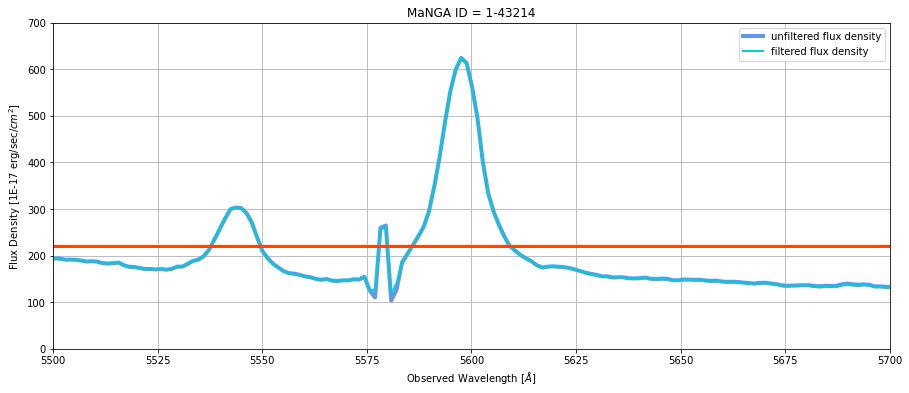

In [13]:
plt.figure(figsize = (15,6))
plt.grid()
# plt.xlim(start, end)
plt.xlim(5500,5700)
plt.ylim(0, height)
# plt.ylim(200,300)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 4, label = 'unfiltered flux density')
# plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 2)
plt.plot(wave[1815 : 1971], sumresult_display, color = 'darkturquoise', linewidth = 2,
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.legend()
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')

In [14]:
line1 = 5607.7
line2 = 5609.5
height1 = 215
height2 = 245

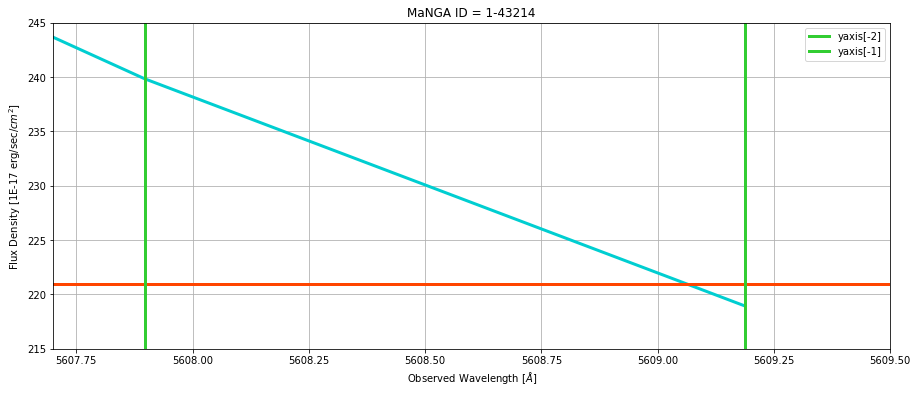

In [15]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis_lower[-2]], color = 'limegreen', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis_lower[-1]], color = 'limegreen', linewidth = 3, label = 'yaxis[-1]')

plt.legend()
#1954 1955
# plt.savefig('Images/Cutting_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [16]:
index2 = np.where(yaxis_lower == yaxis_lower[-2])[0][0]
print(index2)
sumresult[index2]

17


239.8394979313016

In [17]:
# Get x and y of the both coordinates that define the line above 
x = [wave[yaxis_lower[-2]], wave[yaxis_lower[-1]]]
y = [sumresult[index2], sumresult[index2 + 1]]
print(x)
print(y)
print(sumresult[index2])

[5607.8966337451, 5609.188048338182]
[239.8394979313016, 218.93479382246733]
239.8394979313016


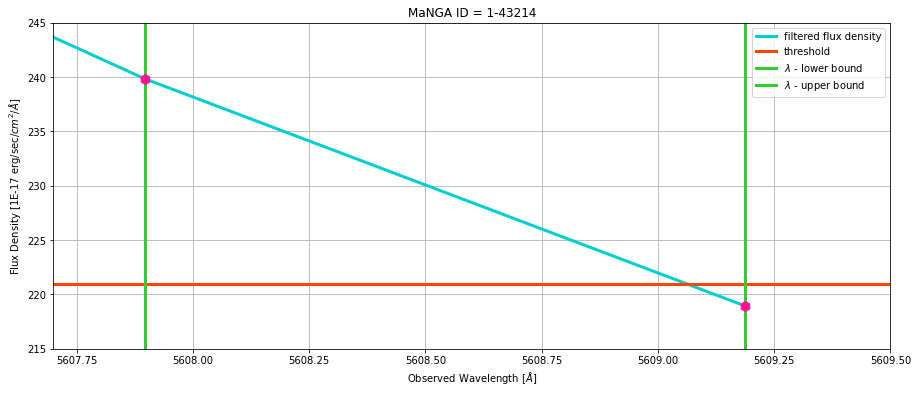

In [18]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
# plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_lower[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_lower[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')

plt.plot(x[0], y[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x[1], y[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Verifying_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [19]:
# Get the gradient of the line above 
m = (y[1] - y[0])/(x[1] - x[0])
m

-16.187446092697883

In [20]:
# Get the y intercept of the line above 
c = y[0] - m*x[0]
c

91017.36395010204

In [21]:
# Define the function y = mx + c 
def func(y, m, c):
    print(y, m, c)
    x = (y - c)/m
    return x

In [22]:
xval = func(sumresult[index], m, c)
xval

220.94608822651207 -16.187446092697883 91017.36395010204


5609.0637980770525

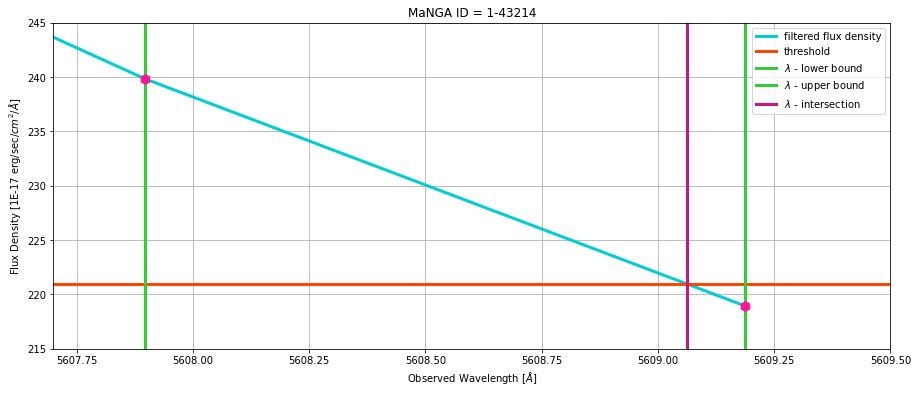

In [23]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1, line2)
plt.ylim(height1, height2)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_lower[-2]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_lower[-1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')
plt.axvline(xval, color = 'mediumvioletred', linewidth = 3, label = r'$\lambda$ - intersection')
plt.plot(x[0], y[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x[1], y[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Intersection_{}'.format(mangaid), bbox_inches = 'tight')

In [24]:
xcoord = []
ycoord = []

for i in range(yaxis_lower[0], yaxis_lower[-1]):
    xcoord.append(wave[i])
    
xcoord.append(xval)
ycoord = sumresult[:-1]
ycoord.append(sumresult[index])
len(xcoord), len(sumresult), len(ycoord)

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

(19, 19, 19)

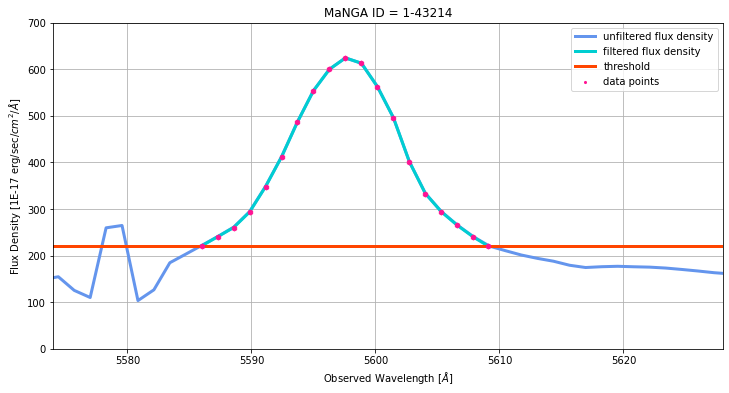

In [25]:
plt.figure(figsize = (12,6))
plt.grid()
plt.xlim(start-1, end-2)
# plt.xlim(5500, 5700)
plt.ylim(0,height)
# plt.ylim(0,700)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3, label = 'unfiltered flux density')
plt.plot(wave[yaxis_lower[0] : yaxis_lower[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3
        , label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 3, color = 'orangered', label = 'threshold')

for i in range(len(xcoord)):
    plt.plot(xcoord[i], ycoord[i], color = 'deeppink', marker = 'h', ms = 5)

plt.scatter(0,0, color = 'deeppink', marker = 'h', s = 5, label = 'data points')
plt.legend()
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')
# plt.savefig('Images/Verifying_Coordinates_{}'.format(mangaid), bbox_inches = 'tight')

In [26]:
dlmd = []
for i in range(len(xcoord)-1):
    dlmd.append(xcoord[i+1] - xcoord[i])

In [27]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area = ycoord[0] * dlmd[0] + ycoord[-1] * dlmd[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord)-1):
#     print(i)
    area += ycoord[i] * (dlmd[i-1] + dlmd[i])

finalarea = (1/2) * area
finalarea

9310.407138682434

In [28]:
subtract = ycoord[0] * (xcoord[-1] - xcoord[0])
subtract

5098.502772403293

In [29]:
fluxarea = finalarea - subtract
fluxarea

4211.904366279141

In [30]:
def Mpc_to_cm(Mpc):
    return Mpc * 3.08568*(10**24)

def luminosity_calc(luminosity_distance, fluxarea):
    return 4 * np.pi * (luminosity_distance**2) * fluxarea * (1e-17)

def BH_calc(luminosity):
    return (3200 * luminosity) / (sol_luminosity * lmd_edd * 3.28 * (10**4))

nsa_z

0.117997

In [31]:
sol_mass = 2 * (10**30)
lmd_edd = 1
sol_luminosity = 3.846 * 10**33

## Upper Bound -- Higher MBH

In [32]:
start_upper = 5570
end_upper = 5670

In [302]:
# select peak region
# index = 0
yaxis = np.where(np.logical_and(wave > start_upper, wave < end_upper))[0]
# print(yaxis)
    
# yaxis = yaxis[6:32]
yaxis_upper = yaxis[9:50]
print(yaxis_upper)
print(len(yaxis_upper))

# for i in yaxis:
#     print(wave[i])

[1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892
 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906
 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919]
41


In [303]:
flux_compare_upper = [] 
ivar_compare_upper = []

for i in yaxis_upper:
    flux_compare_upper.append(flux[:,:,i].flatten())
    ivar_compare_upper.append(ivar[:,:,i].flatten())

flux_compare_upper = np.array(flux_compare_upper)
ivar_compare_upper = np.array(ivar_compare_upper)

len(flux_compare_upper[0]), len(ivar_compare_upper)

(1156, 41)

In [306]:
result_upper = []
sumresult_upper = []

for i in range(len(yaxis_upper)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare_upper[i][j]) if ivar_compare_upper[i][j] != 0 else 0
        
        if flux_compare_upper[i][j] < (3 * sigma):
            result_upper.append(0)
        else:
            result_upper.append(flux_compare_upper[i][j])
    sumresult_upper.append(np.sum(result_upper))
    result_upper = []

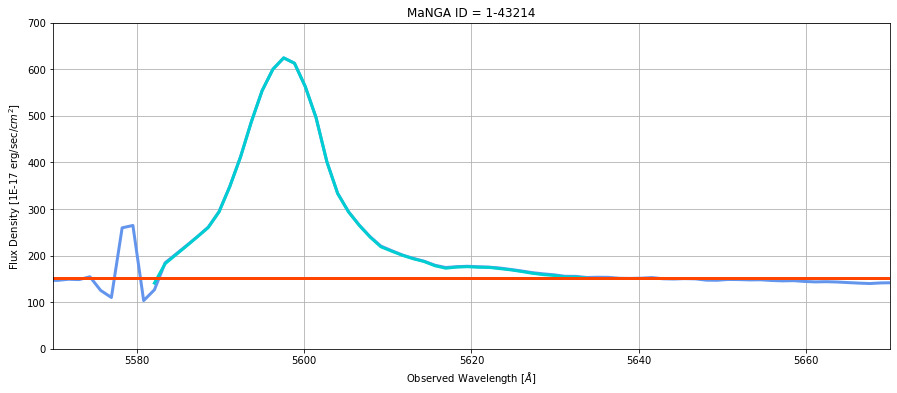

In [307]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(start_upper, end_upper)
# plt.xlim(5590, 5595)
plt.ylim(0, height)
# plt.ylim(120, 160)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult_upper[-1], linewidth = 3, color = 'orangered')
# plt.savefig('Images/3sigma_subtracted_{}'.format(mangaid), bbox_inches = 'tight')

In [308]:
line1_upper = 5582
line2_upper = 5584
height1_upper = 140
height2_upper = 185

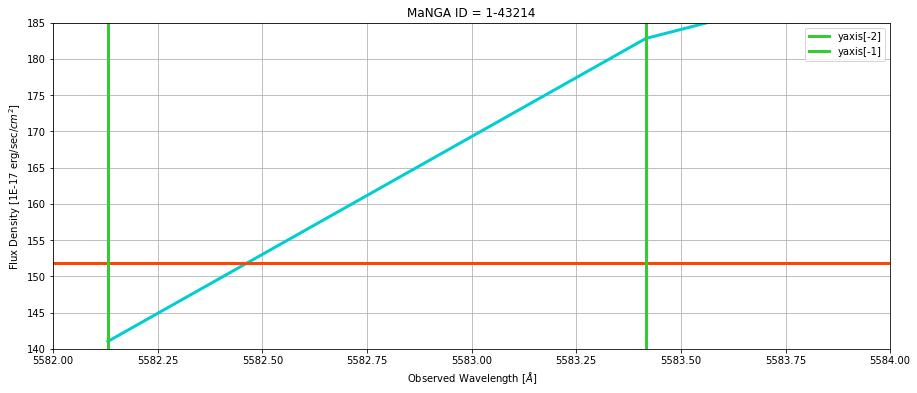

In [309]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1_upper, line2_upper)
plt.ylim(height1_upper, height2_upper)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3)
plt.axhline(sumresult_upper[-1], linewidth = 3, color = 'orangered')

plt.axvline(wave[yaxis_upper[0]], color = 'limegreen', linewidth = 3, label = 'yaxis[-2]')
plt.axvline(wave[yaxis_upper[1]], color = 'limegreen', linewidth = 3, label = 'yaxis[-1]')

plt.legend()
#1954 1955
# plt.savefig('Images/Cutting_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [310]:
index2_upper = np.where(yaxis_upper == yaxis_upper[1])[0][0]
print(index2_upper)
sumresult_upper[index2_upper]

1


182.81499693356454

In [311]:
# Get x and y of the both coordinates that define the line above 
x_upper = [wave[yaxis_upper[0]], wave[yaxis_upper[1]]]
# y_upper = [sumresult_upper[index2_upper], sumresult_upper[index2_upper + 1]]
y_upper = [sumresult_upper[0], sumresult_upper[1]]

print(x_upper)
print(y_upper)
print(sumresult_upper[index2_upper])

[5582.130689177262, 5583.416170259268]
[141.01716724038124, 182.81499693356454]
182.81499693356454


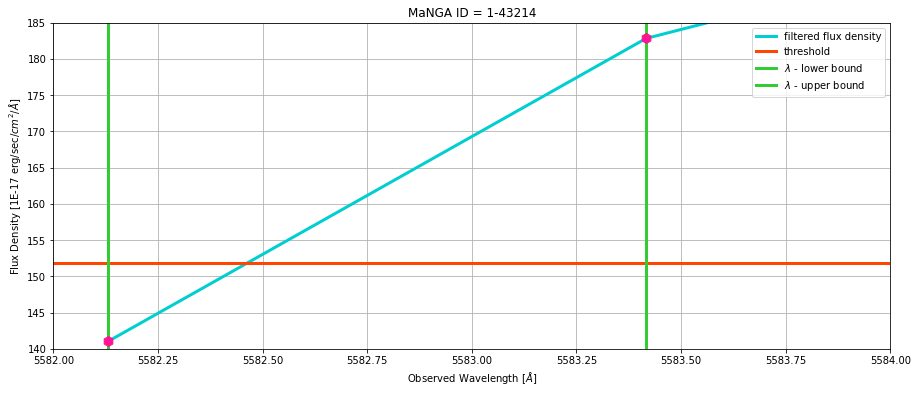

In [312]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1_upper, line2_upper)
plt.ylim(height1_upper, height2_upper)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
# plt.axhline(sumresult[index2], linewidth = 3, color = 'green', label = 'sumresult[index2]')

plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult_upper[-1], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_upper[0]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_upper[1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')

plt.plot(x_upper[0], y_upper[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x_upper[1], y_upper[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Verifying_Region_{}'.format(mangaid), bbox_inches = 'tight')

In [313]:
# Get the gradient of the line above 
m_upper = (y_upper[1] - y_upper[0])/(x_upper[1] - x_upper[0])
m_upper

32.51532074509244

In [314]:
# Get the y intercept of the line above 
c_upper = y_upper[0] - m_upper*x_upper[0]
c_upper

-181363.75263238218

In [315]:
xval_upper = func(sumresult_upper[-1], m_upper, c_upper)
xval_upper

151.79097491689026 32.51532074509244 -181363.75263238218


5582.46203475312

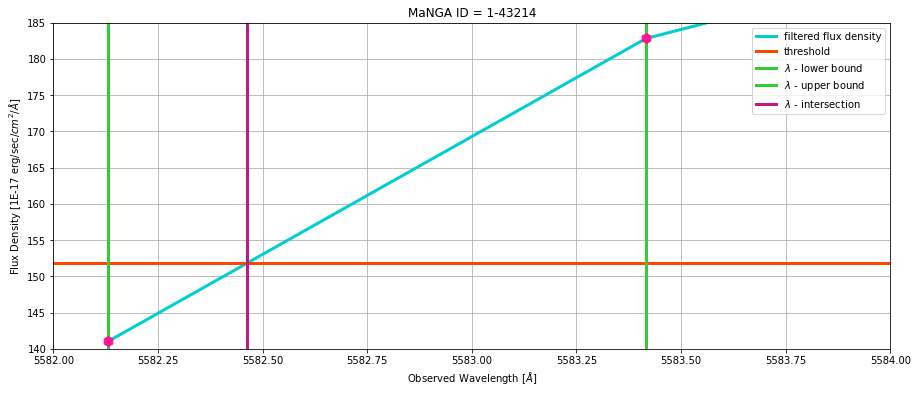

In [316]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(line1_upper, line2_upper)
plt.ylim(height1_upper, height2_upper)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
# plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3, 
        label = 'filtered flux density')
plt.axhline(sumresult_upper[-1], linewidth = 3, color = 'orangered', label = 'threshold')

plt.axvline(wave[yaxis_upper[0]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - lower bound')
plt.axvline(wave[yaxis_upper[1]], color = 'limegreen', linewidth = 3, label = r'$\lambda$ - upper bound')
plt.axvline(xval_upper, color = 'mediumvioletred', linewidth = 3, label = r'$\lambda$ - intersection')
plt.plot(x_upper[0], y_upper[0], marker = 'h', ms = 10, color = 'deeppink')
plt.plot(x_upper[1], y_upper[1], marker = 'h', ms = 10, color = 'deeppink')

plt.legend(loc = 'upper right')
#1954 1955
# plt.savefig('Images/Intersection_{}'.format(mangaid), bbox_inches = 'tight')

In [317]:
xcoord_upper = []
ycoord_upper = []

xcoord_upper.append(xval_upper)
# ycoord_upper.append(sumresult_upper[-1])
for i in range(yaxis_upper[1], yaxis_upper[-1]+1):
    xcoord_upper.append(wave[i])
    

ycoord_upper = sumresult_upper[:]
ycoord_upper[0] = sumresult_upper[-1]
# ycoord_upper.append(sumresult_upper[index])
len(xcoord_upper), len(sumresult_upper), len(ycoord_upper)

# print(xcoord[-1])
# print(sumresult[-1])
# print(sumresult[index])
# print(ycoord)

(41, 41, 41)

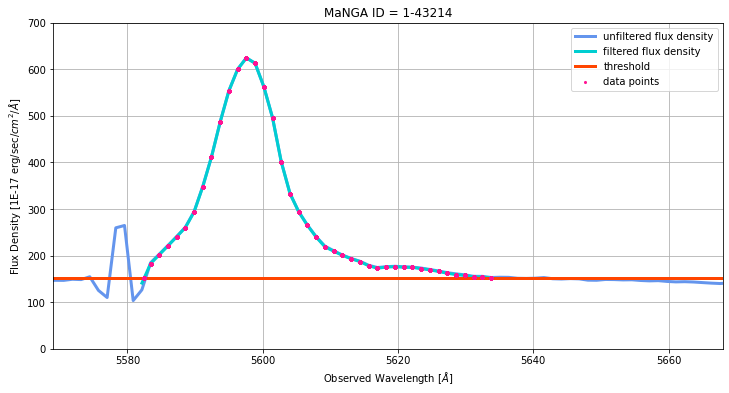

In [318]:
plt.figure(figsize = (12,6))
plt.grid()
# plt.xlim(5620, 5640)
# plt.ylim(100,200)
plt.xlim(start_upper-1, end_upper-2)
plt.ylim(0,height)
# plt.xlim(line1_upper, line2_upper)
# plt.ylim(height1_upper, height2_upper)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3, label = 'unfiltered flux density')
plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 3
        , label = 'filtered flux density')
plt.axhline(sumresult_upper[-1], linewidth = 3, color = 'orangered', label = 'threshold')

for i in range(len(xcoord_upper)):
    plt.plot(xcoord_upper[:], ycoord_upper[:], color = 'deeppink', marker = 'h', ms = 3 ,ls = '')

plt.scatter(0,0, color = 'deeppink', marker = 'h', s = 5, label = 'data points')
plt.legend()
# plt.plot(xcoord[-1], sumresult[index], marker = 'h', ms = 15, color = 'green')
# plt.savefig('Images/Verifying_Coordinates_{}'.format(mangaid), bbox_inches = 'tight')

In [319]:
dlmd_upper = []
for i in range(len(xcoord_upper)-1):
    dlmd_upper.append(xcoord_upper[i+1] - xcoord_upper[i])

In [320]:
# Trapezium rule
# area = y_1 * h_1 + y_last * h_last + the in betweens 
area_upper = ycoord_upper[0] * dlmd_upper[0] + ycoord_upper[-1] * dlmd_upper[-1]
# print(ycoord[0] * dlmd[0])
# print(ycoord[-1] * dlmd[-1])

for i in range(1, len(ycoord_upper)-1):
#     print(i)
    area_upper += ycoord_upper[i] * (dlmd_upper[i-1] + dlmd_upper[i])

finalarea_upper = (1/2) * area_upper
finalarea_upper

14317.027374832234

In [321]:
subtract_upper = ycoord_upper[0] * (xcoord_upper[-1] - xcoord_upper[0])
subtract_upper

7789.832953684864

In [322]:
fluxarea_upper = finalarea_upper - subtract_upper
fluxarea_upper

6527.19442114737

In [323]:
luminosity_distance = Mpc_to_cm(549.6)
luminosity_upper = luminosity_calc(luminosity_distance, fluxarea_upper)
print(luminosity_distance, 'cm', '/', luminosity_upper, ('erg/s (?)'))

1.695889728e+27 cm / 2.35902005100795e+42 erg/s (?)


In [324]:
luminosity_distance = Mpc_to_cm(549.6)
luminosity = luminosity_calc(luminosity_distance, fluxarea)
print(luminosity_distance, 'cm', '/', luminosity, ('erg/s (?)'))

1.695889728e+27 cm / 1.5222415959893917e+42 erg/s (?)


## Results

In [325]:
print(mangaid)
print(nsa_z)

print()

print('Luminosity Distance before conversion = ', 549.6)
print('Luminosity Distance = ', luminosity_distance, 'cm')

print()

print('flux = ', 5244.039902714659)
print('Luminosity = ', 1.895269924657014e+42, 'erg/s (?)')
print('M_BH / M_sol = 48077062.63478087')
print('log(luminosity) = 42.27767107100116')
print('log(M_BH / M_sol) = 7.681937925706926')
print('log(luminosity / sol_lum) = 8.692661791098699')

print()

print('Upper Bound')
print('flux', fluxarea_upper)
print('Luminosity =', luminosity_upper, 'erg/s (?)')
print('M_BH / M_sol =',BH_calc(luminosity_upper))
print('log(luminosity) =',np.log10(luminosity_upper))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity_upper)))
print('log(luminosity / sol_lum) =', np.log10(luminosity_upper / sol_luminosity))

print()

print('Lower Bound')
print('flux', fluxarea)
print('Luminosity =', luminosity, 'erg/s (?)')
print('M_BH / M_sol =',BH_calc(luminosity))
print('log(luminosity) =',np.log10(luminosity))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity)))
print('log(luminosity / sol_lum) =', np.log10(luminosity / sol_luminosity))

1-43214
0.117997

Luminosity Distance before conversion =  549.6
Luminosity Distance =  1.695889728e+27 cm

flux =  5244.039902714659
Luminosity =  1.895269924657014e+42 erg/s (?)
M_BH / M_sol = 48077062.63478087
log(luminosity) = 42.27767107100116
log(M_BH / M_sol) = 7.681937925706926
log(luminosity / sol_lum) = 8.692661791098699

Upper Bound
flux 6527.19442114737
Luminosity = 2.35902005100795e+42 erg/s (?)
M_BH / M_sol = 59840951.02946236
log(luminosity) = 42.37273163228242
log(M_BH / M_sol) = 7.776998486988183
log(luminosity / sol_lum) = 8.787722352379955

Lower Bound
flux 4211.904366279141
Luminosity = 1.5222415959893917e+42 erg/s (?)
M_BH / M_sol = 38614502.136889555
log(luminosity) = 42.18248358507472
log(M_BH / M_sol) = 7.58675043978049
log(luminosity / sol_lum) = 8.597474305172263


In [326]:
print('UPPER BOUND')
print('flux', fluxarea_upper)
print('M_BH / M_sol =',BH_calc(luminosity_upper))
print('log(luminosity) =',np.log10(luminosity_upper))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity_upper)))
print('log(luminosity / sol_lum) =', np.log10(luminosity_upper / sol_luminosity))

UPPER BOUND
flux 6527.19442114737
M_BH / M_sol = 59840951.02946236
log(luminosity) = 42.37273163228242
log(M_BH / M_sol) = 7.776998486988183
log(luminosity / sol_lum) = 8.787722352379955


In [327]:
print('LOWER BOUND')
print('flux', fluxarea)
print('M_BH / M_sol =',BH_calc(luminosity))
print('log(luminosity) =',np.log10(luminosity))
print('log(M_BH / M_sol) =', np.log10(BH_calc(luminosity)))
print('log(luminosity / sol_lum) =', np.log10(luminosity / sol_luminosity))

LOWER BOUND
flux 4211.904366279141
M_BH / M_sol = 38614502.136889555
log(luminosity) = 42.18248358507472
log(M_BH / M_sol) = 7.58675043978049
log(luminosity / sol_lum) = 8.597474305172263


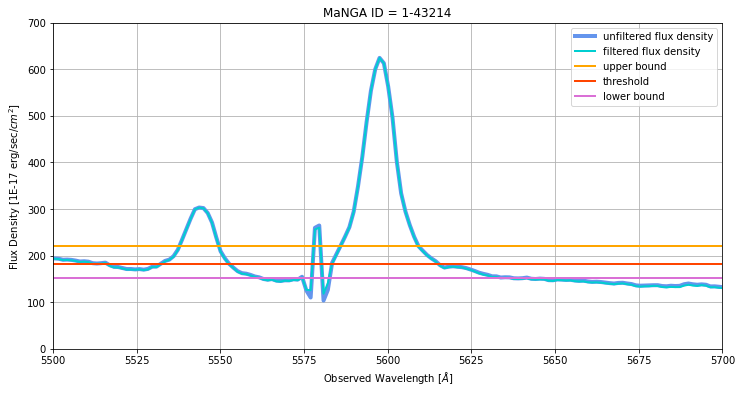

In [328]:
plt.figure(figsize = (12,6))
plt.grid()
# plt.xlim(start, end)
plt.xlim(5500,5700)
plt.ylim(0, height)
# plt.ylim(200,300)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 4, label = 'unfiltered flux density')
# plt.plot(wave[yaxis_upper[0] : yaxis_upper[-1] + 1], sumresult_upper, color = 'darkturquoise', linewidth = 2,
#         label = 'filtered flux density')
plt.plot(wave[1815 : 1971], sumresult_display, color = 'darkturquoise', linewidth = 2,
        label = 'filtered flux density')
plt.axhline(sumresult[index], linewidth = 2, color = 'orange', label = 'upper bound')

plt.axhline(182.81499693356454, linewidth = 2, color = 'orangered', label = 'threshold')

plt.axhline(sumresult_upper[-1], linewidth = 2, color = 'orchid', label = 'lower bound')


plt.legend()

# plt.savefig('Images/ub_th_lb.png', bbox_inches = 'tight')